<a href="https://colab.research.google.com/github/gabrielalins-stack/programacao-estatistica/blob/main/Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Exercício 1

Considere a integral
$$
\theta = \int_0^1 \frac{1}{1+x^2}\, dx = \frac{\pi}{4}.
$$


### Tarefas

1. Implemente uma simulação de Monte Carlo para estimar $\pi$ a partir da expressão acima.  

2. Proponha uma variável de controle adequada e derive o estimador controlado.  

3. Compare, via simulação, as estimativas obtidas com e sem variável de controle e a variância dos estimadores.  


In [ ]:
def mont_carl(n):
  soma = 0
  for i in range(n):
    x = np.random.uniform()
    soma += 1 / (1 + x**2)
  return soma / n
print(mont_carl(1000))

0.7847251838912436


In [ ]:
us = np.random.uniform(size=1000)
xs = 1 / (1 + us**2)

ys = us**2
mu_y = 1/3

cs = np.cov(xs, ys)
c = -cs[0,1] / cs[1,1]

zs = xs + c*(ys - mu_y)

(array([44.74288234, 21.20928838, 13.94583346, 12.78368067,  9.00668411,
        10.1688369 , 10.45937509,  9.2972223 ,  6.39184033,  8.13506952,
         6.10130214,  9.00668411,  8.13506952,  7.84453132,  8.71614591,
         7.26345493,  9.5877605 , 11.04045149,  9.2972223 , 12.78368067,
        14.23637165, 23.24305576,  1.45269099,  3.48645836,  4.06753476,
         3.19592017,  1.74322918,  0.87161459,  1.45269099,  0.87161459]),
 array([0.74933016, 0.75277205, 0.75621394, 0.75965583, 0.76309772,
        0.7665396 , 0.76998149, 0.77342338, 0.77686527, 0.78030716,
        0.78374905, 0.78719093, 0.79063282, 0.79407471, 0.7975166 ,
        0.80095849, 0.80440038, 0.80784226, 0.81128415, 0.81472604,
        0.81816793, 0.82160982, 0.8250517 , 0.82849359, 0.83193548,
        0.83537737, 0.83881926, 0.84226115, 0.84570303, 0.84914492,
        0.85258681]),
 <BarContainer object of 30 artists>)

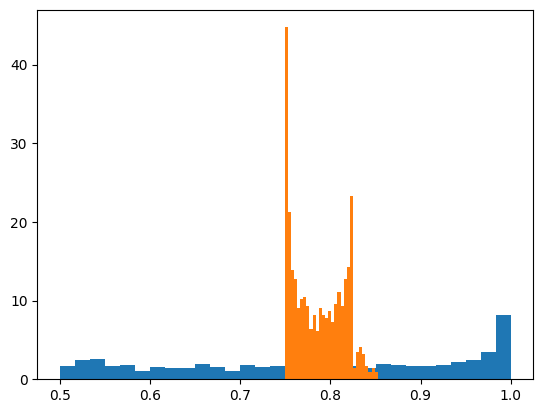

In [ ]:
plt.hist(xs, density = True, bins = 30) #azul
plt.hist(zs, density = True, bins = 30) #laranja

# Exercício 2

Desenvolva o exemplo 21 das nossas notas de aula. Compare as estimativas do método com e sem controle e compare as variâncias dos estimadores.

In [ ]:
us = np.random.uniform(size = 100000)

xs = np.exp(us)

ys = us
mu_y = 0.5

cs = np.cov(xs, ys)
c = -cs[0,1] / cs[1,1]

zs = xs + c*(ys - mu_y)

In [ ]:
print(np.var(xs))
print(np.var(zs))

0.24187994760629225
0.003953446563343974


(array([25.37631334, 10.40470231,  7.9817443 ,  6.79629708,  5.8191041 ,
         5.40259562,  4.97407246,  4.57224858,  4.29324129,  4.06362764,
         3.87806777,  3.73522672,  3.6057353 ,  3.51228788,  3.30403364,
         3.12381363,  3.14116815,  3.11980874,  2.99966206,  2.85949093,
         2.71931981,  2.75002396,  2.71131003,  2.74601907,  2.61519269,
         2.44164749,  1.44176013,  1.03993625,  1.01457195,  1.05328588]),
 array([1.64819109, 1.65568194, 1.66317278, 1.67066362, 1.67815447,
        1.68564531, 1.69313616, 1.700627  , 1.70811784, 1.71560869,
        1.72309953, 1.73059037, 1.73808122, 1.74557206, 1.75306291,
        1.76055375, 1.76804459, 1.77553544, 1.78302628, 1.79051713,
        1.79800797, 1.80549881, 1.81298966, 1.8204805 , 1.82797134,
        1.83546219, 1.84295303, 1.85044388, 1.85793472, 1.86542556,
        1.87291641]),
 <BarContainer object of 30 artists>)

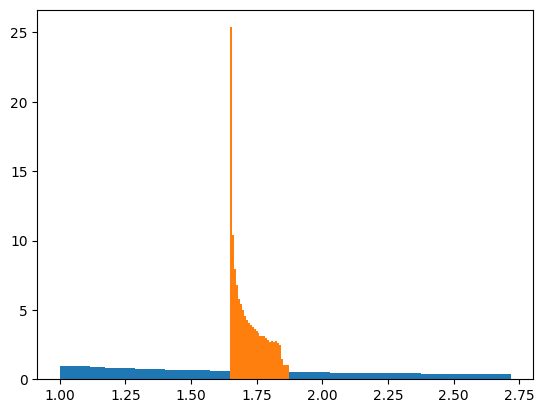

In [ ]:
plt.hist(xs, density = True, bins = 30) #azul
plt.hist(zs, density = True, bins = 30) #laranja

## Exercício 3

Considere a variável aleatória $X \sim \mathrm{Exp}(1)$. Queremos estimar

$$
\theta = \mathbb{P}(X > 1) = e^{-1}.
$$

### Tarefas

1. Implemente um estimador de Monte Carlo para \(\theta\) usando  
   $$
   \hat{\theta}_{\text{MC}}
   = \frac{1}{n} \sum_{i=1}^n \mathbf{1}\{X_i > 1\}.
   $$

2. Escolha uma variável de controle adequada, derive o estimador controlado e escreva sua forma final.

3. Compare, via simulação, as variâncias dos estimadores com e sem variável de controle.


In [ ]:
def exponencial(lam):
  u = np.random.uniform()
  x = (-1)*np.log(u)/lam
  return x

In [ ]:
def monte_carlo(n):
  soma = 0
  for i in range(n):
    x = exponencial(1)
    if x > 1:
      soma += 1
  return soma / n

print(monte_carlo(1000))

0.352


In [ ]:
n = 1000

xs = []
ys = []

for i in range(n):
    x = exponencial(1)
    xs.append(1 if x > 1 else 0)
    ys.append(x)

xs = np.array(xs)
ys = np.array(ys)
mu_y = 1

cs = np.cov(xs, ys)

c = - cs[0,1] / cs[1,1]

zs = xs + c * (ys - mu_y)


(array([0.01355261, 0.        , 0.        , 0.        , 0.01355261,
        0.        , 0.01355261, 0.01355261, 0.01355261, 0.        ,
        0.        , 0.04065783, 0.01355261, 0.08131566, 0.04065783,
        0.01355261, 0.82670921, 1.04355097, 1.32815578, 1.61276059,
        2.19552282, 2.42591719, 0.28460481, 0.2710522 , 0.31171003,
        0.47434135, 0.48789396, 0.33881525, 0.84026182, 0.85381443]),
 array([-1.21461211, -1.14082558, -1.06703906, -0.99325253, -0.91946601,
        -0.84567948, -0.77189296, -0.69810643, -0.62431991, -0.55053338,
        -0.47674685, -0.40296033, -0.3291738 , -0.25538728, -0.18160075,
        -0.10781423, -0.0340277 ,  0.03975882,  0.11354535,  0.18733187,
         0.2611184 ,  0.33490492,  0.40869145,  0.48247797,  0.5562645 ,
         0.63005102,  0.70383755,  0.77762407,  0.8514106 ,  0.92519712,
         0.99898365]),
 <BarContainer object of 30 artists>)

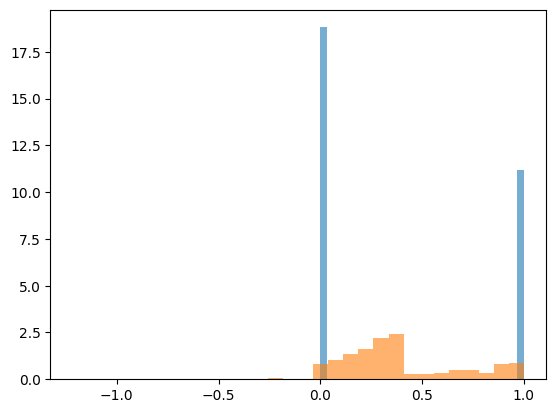

In [ ]:
plt.hist(xs, density=True, bins=30, alpha=0.6)#azul
plt.hist(zs, density=True, bins=30, alpha=0.6)#laranja